In [32]:
%matplotlib inline

import pandas as pd
import networkx as nx

import warnings
from operator import itemgetter
from networkx.algorithms import community

In [33]:
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style("whitegrid")

from operator import is_not
from functools import partial

In [34]:
df = pd.read_csv("node2vec-target.csv")
df

,partai,kalimat,kata0,kata1,kata2,kata3,kata4,kategori
0,Demokrat,juang aspirasi rakyat aceh indonesia,juang,bidang,bangun,masyarakat,masyarakat,Pembangunan Daerah
1,Nasdem,juang hak hak kaum perempuan,juang,bangun,masyarakat,masyarakat,masyarakat,Pembangunan Daerah
2,Gerindra,juang hak hak perempuan bangun aceh,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
3,Golkar,juang aspirasi rakyat aceh indonesia,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
4,PKS,1 juang program aksi gerindra tingkat sehat ma...,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
5,PPP,1 juang misi pks,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
6,PKB,juang wujud masyarakat cerdas,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
7,PSI,juang sejahtera buruh kerja keluarga,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
8,PAN,a dorong tinjau ulang amandemen uud cita cita ...,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah
9,PKPI,juang disparitas ekonomi kabupaten cianjur uta...,juang,bidang,bangun,masyarakat,utara,Pembangunan Daerah


In [35]:
g = nx.from_pandas_edgelist(df, source='kategori', target='kata0')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata1')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata2')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata3')
g = nx.from_pandas_edgelist(df, source='kategori', target='kata4')

In [36]:
g = nx.from_pandas_edgelist(df, source='partai', target='kategori')

In [37]:
dfpartaikata0 = df[['partai','kata0']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata0clean = dfpartaikata0.dropna()
dfpartaikata0clean
listpartaikata0 = dfpartaikata0clean.values.tolist()
listpartaikata0

[['Demokrat', 'juang'],
 ['Nasdem', 'juang'],
 ['Gerindra', 'juang'],
 ['Golkar', 'juang'],
 ['PKS', 'juang'],
 ['PPP', 'juang'],
 ['PKB', 'juang'],
 ['PSI', 'juang'],
 ['PAN', 'juang'],
 ['PKPI', 'juang'],
 ['Garuda', 'juang'],
 ['Hanura', 'juang'],
 ['Berkarya', 'juang'],
 ['PDIP', 'juang'],
 ['PBB', 'juang'],
 ['Gerindra', 'masyarakat'],
 ['Berkarya', 'masyarakat'],
 ['PKS', 'masyarakat'],
 ['PKB', 'masyarakat'],
 ['Golkar', 'masyarakat'],
 ['PSI', 'masyarakat'],
 ['PPP', 'masyarakat'],
 ['PKPI', 'masyarakat'],
 ['PDIP', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['PAN', 'masyarakat'],
 ['Garuda', 'masyarakat'],
 ['PBB', 'masyarakat'],
 ['Hanura', 'masyarakat'],
 ['Demokrat', 'masyarakat'],
 ['PPP', 'provinsi'],
 ['PSI', 'provinsi'],
 ['PKB', 'provinsi'],
 ['Nasdem', 'provinsi'],
 ['Gerindra', 'provinsi'],
 ['PAN', 'provinsi'],
 ['Golkar', 'provinsi'],
 ['Berkarya', 'provinsi'],
 ['PDIP', 'provinsi'],
 ['Garuda', 'provinsi'],
 ['PKS', 'provinsi'],
 ['Hanura', 'provinsi'],
 ['Demokra

In [38]:
dfpartaikata1 = df[['partai','kata1']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata1clean = dfpartaikata1.dropna()
dfpartaikata1clean
listpartaikata1 = dfpartaikata1clean.values.tolist()
listpartaikata1

[['Demokrat', 'bidang'],
 ['Nasdem', 'bangun'],
 ['Gerindra', 'bidang'],
 ['Golkar', 'bidang'],
 ['PKS', 'bidang'],
 ['PPP', 'bidang'],
 ['PKB', 'bidang'],
 ['PSI', 'bidang'],
 ['PAN', 'bidang'],
 ['PKPI', 'bidang'],
 ['Garuda', 'bidang'],
 ['Hanura', 'bidang'],
 ['Berkarya', 'bidang'],
 ['PDIP', 'bidang'],
 ['PBB', 'bidang'],
 ['Gerindra', 'tingkat'],
 ['Berkarya', 'hak'],
 ['PKS', 'hak'],
 ['PKB', 'tingkat'],
 ['Golkar', 'tingkat'],
 ['PSI', 'hak'],
 ['PPP', 'tingkat'],
 ['PKPI', 'hak'],
 ['PDIP', 'hak'],
 ['Nasdem', 'hak'],
 ['PAN', 'hak'],
 ['Garuda', 'hak'],
 ['PBB', 'hak'],
 ['Hanura', 'hak'],
 ['Demokrat', 'tingkat'],
 ['PPP', 'masyarakat'],
 ['PSI', 'masyarakat'],
 ['PKB', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['Gerindra', 'masyarakat'],
 ['PAN', 'masyarakat'],
 ['Golkar', 'masyarakat'],
 ['Berkarya', 'masyarakat'],
 ['PDIP', 'masyarakat'],
 ['Garuda', 'masyarakat'],
 ['PKS', 'masyarakat'],
 ['Hanura', 'masyarakat'],
 ['Demokrat', 'masyarakat'],
 ['PKPI', 'masyarakat'],
 [

In [39]:
dfpartaikata2 = df[['partai','kata2']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata2clean = dfpartaikata2.dropna()
dfpartaikata2clean
listpartaikata2 = dfpartaikata2clean.values.tolist()
listpartaikata2

[['Demokrat', 'bangun'],
 ['Nasdem', 'masyarakat'],
 ['Gerindra', 'bangun'],
 ['Golkar', 'bangun'],
 ['PKS', 'bangun'],
 ['PPP', 'bangun'],
 ['PKB', 'bangun'],
 ['PSI', 'bangun'],
 ['PAN', 'bangun'],
 ['PKPI', 'bangun'],
 ['Garuda', 'masyarakat'],
 ['Hanura', 'bangun'],
 ['Berkarya', 'bangun'],
 ['PDIP', 'bangun'],
 ['PBB', 'bangun'],
 ['Gerindra', 'pihak'],
 ['Berkarya', 'tingkat'],
 ['PKS', 'tingkat'],
 ['PKB', 'pihak'],
 ['Golkar', 'pihak'],
 ['PSI', 'tingkat'],
 ['PPP', 'pihak'],
 ['PKPI', 'tingkat'],
 ['PDIP', 'tingkat'],
 ['Nasdem', 'tingkat'],
 ['PAN', 'tingkat'],
 ['Garuda', 'tingkat'],
 ['PBB', 'tingkat'],
 ['Hanura', 'tingkat'],
 ['Demokrat', 'pihak'],
 ['PPP', 'bangun'],
 ['PSI', 'bangun'],
 ['PKB', 'bangun'],
 ['Nasdem', 'bangun'],
 ['Gerindra', 'bangun'],
 ['PAN', 'bangun'],
 ['Golkar', 'bangun'],
 ['Berkarya', 'bangun'],
 ['PDIP', 'bangun'],
 ['Garuda', 'bangun'],
 ['PKS', 'dprd'],
 ['Hanura', 'bangun'],
 ['Demokrat', 'bangun'],
 ['PKPI', 'bangun'],
 ['PBB', 'bangun']]

In [40]:
dfpartaikata3 = df[['partai','kata3']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata3clean = dfpartaikata3.dropna()
dfpartaikata3clean
listpartaikata3 = dfpartaikata3clean.values.tolist()
listpartaikata3

[['Demokrat', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['Gerindra', 'masyarakat'],
 ['Golkar', 'masyarakat'],
 ['PKS', 'masyarakat'],
 ['PPP', 'masyarakat'],
 ['PKB', 'masyarakat'],
 ['PSI', 'masyarakat'],
 ['PAN', 'masyarakat'],
 ['PKPI', 'masyarakat'],
 ['Garuda', 'utara'],
 ['Hanura', 'masyarakat'],
 ['Berkarya', 'masyarakat'],
 ['PDIP', 'masyarakat'],
 ['PBB', 'masyarakat'],
 ['Gerindra', 'perintah'],
 ['Berkarya', 'perintah'],
 ['PKS', 'pihak'],
 ['PKB', 'perintah'],
 ['Golkar', 'perintah'],
 ['PSI', 'pihak'],
 ['PPP', 'perintah'],
 ['PKPI', 'perintah'],
 ['PDIP', 'pihak'],
 ['Nasdem', 'pihak'],
 ['PAN', 'pihak'],
 ['Garuda', 'pihak'],
 ['PBB', 'tingkat'],
 ['Hanura', 'pihak'],
 ['Demokrat', 'perintah'],
 ['PPP', 'dprd'],
 ['PSI', 'dprd'],
 ['PKB', 'dprd'],
 ['Nasdem', 'dprd'],
 ['Gerindra', 'dprd'],
 ['PAN', 'dprd'],
 ['Golkar', 'dprd'],
 ['Berkarya', 'dprd'],
 ['PDIP', 'dprd'],
 ['Garuda', 'dprd'],
 ['PKS', 'fungsi'],
 ['Hanura', 'dprd'],
 ['Demokrat', 'dprd'],
 ['PKPI', 'dprd

In [41]:
dfpartaikata4 = df[['partai','kata4']]
#dfpartaikata2clean = dfpartaikata2[df['kata2'].notna()]
dfpartaikata4clean = dfpartaikata4.dropna()
dfpartaikata4clean
listpartaikata4 = dfpartaikata4clean.values.tolist()
listpartaikata4

[['Demokrat', 'masyarakat'],
 ['Nasdem', 'masyarakat'],
 ['Gerindra', 'utara'],
 ['Golkar', 'utara'],
 ['PKS', 'utara'],
 ['PPP', 'utara'],
 ['PKB', 'utara'],
 ['PSI', 'utara'],
 ['PAN', 'utara'],
 ['PKPI', 'utara'],
 ['Garuda', 'utara'],
 ['Hanura', 'utara'],
 ['Berkarya', 'utara'],
 ['PDIP', 'utara'],
 ['PBB', 'masyarakat'],
 ['Gerindra', 'perintah'],
 ['Berkarya', 'perintah'],
 ['PKS', 'perintah'],
 ['PKB', 'perintah'],
 ['Golkar', 'perintah'],
 ['PSI', 'perintah'],
 ['PPP', 'perintah'],
 ['PKPI', 'perintah'],
 ['PDIP', 'perintah'],
 ['Nasdem', 'perintah'],
 ['PAN', 'perintah'],
 ['Garuda', 'perintah'],
 ['PBB', 'tingkat'],
 ['Hanura', 'perintah'],
 ['Demokrat', 'perintah'],
 ['PPP', 'fungsi'],
 ['PSI', 'fungsi'],
 ['PKB', 'fungsi'],
 ['Nasdem', 'fungsi'],
 ['Gerindra', 'fungsi'],
 ['PAN', 'fungsi'],
 ['Golkar', 'fungsi'],
 ['Berkarya', 'fungsi'],
 ['PDIP', 'fungsi'],
 ['Garuda', 'fungsi'],
 ['PKS', 'fungsi'],
 ['Hanura', 'fungsi'],
 ['Demokrat', 'fungsi'],
 ['PKPI', 'fungsi'],
 ['P

In [42]:
g.add_edges_from(listpartaikata0,weight=1, label="partaikata0edge")
g.add_edges_from(listpartaikata1,weight=1, label="partaikata1edge")
g.add_edges_from(listpartaikata2,weight=1, label="partaikata2edge")
g.add_edges_from(listpartaikata3,weight=1, label="partaikata3edge")
g.add_edges_from(listpartaikata4,weight=1, label="partaikata3edge")

In [43]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels
labelsclean = {k: v for k, v in labels.items() if pd.Series(v).notna().all()}
labelsclean

{'Demokrat': 'Demokrat',
 'Pembangunan Daerah': 'Pembangunan Daerah',
 'Nasdem': 'Nasdem',
 'Gerindra': 'Gerindra',
 'Golkar': 'Golkar',
 'PKS': 'PKS',
 'PPP': 'PPP',
 'PKB': 'PKB',
 'PSI': 'PSI',
 'PAN': 'PAN',
 'PKPI': 'PKPI',
 'Garuda': 'Garuda',
 'Hanura': 'Hanura',
 'Berkarya': 'Berkarya',
 'PDIP': 'PDIP',
 'PBB': 'PBB',
 'Pergerakan Nasional': 'Pergerakan Nasional',
 'Peran Anggota Legislatif': 'Peran Anggota Legislatif',
 'juang': 'juang',
 'masyarakat': 'masyarakat',
 'provinsi': 'provinsi',
 'bidang': 'bidang',
 'bangun': 'bangun',
 'tingkat': 'tingkat',
 'hak': 'hak',
 'pihak': 'pihak',
 'dprd': 'dprd',
 'utara': 'utara',
 'perintah': 'perintah',
 'fungsi': 'fungsi'}

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


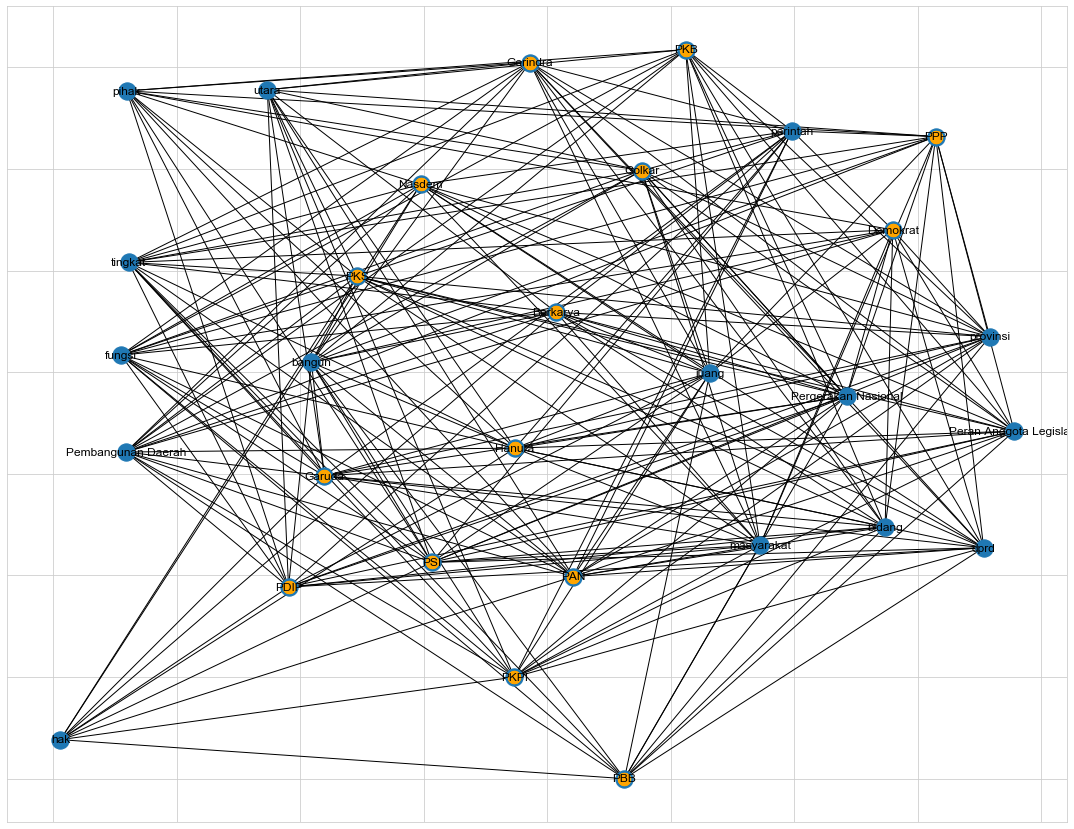

In [44]:
fig, ax = plt.subplots(figsize=(19,15))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels = True)
nx.draw_networkx_edges(g, layout, ax = ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)
partaipopuler = [namapartai for namapartai in df.partai if g.degree(namapartai) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=partaipopuler, node_color='orange', node_size=150)

In [45]:
# Precompute probabilities and generate walks
node2vec = Node2Vec(g, dimensions=50, walk_length=16, num_walks=100, workers=4)

Computing transition probabilities: 100%|██████████| 30/30 [00:00<00:00, 477.46it/s]


In [46]:
# EmbedQ
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [47]:
df.partai

0     Demokrat
1       Nasdem
2     Gerindra
3       Golkar
4          PKS
5          PPP
6          PKB
7          PSI
8          PAN
9         PKPI
10      Garuda
11      Hanura
12    Berkarya
13        PDIP
14         PBB
15    Gerindra
16    Berkarya
17         PKS
18         PKB
19      Golkar
20         PSI
21         PPP
22        PKPI
23        PDIP
24      Nasdem
25         PAN
26      Garuda
27         PBB
28      Hanura
29    Demokrat
30         PPP
31         PSI
32         PKB
33      Nasdem
34    Gerindra
35         PAN
36      Golkar
37    Berkarya
38        PDIP
39      Garuda
40         PKS
41      Hanura
42    Demokrat
43        PKPI
44         PBB
Name: partai, dtype: object

In [48]:
used = set()
nodepartai = [x for x in df.partai if x not in used and (used.add(x) or True)]
#nodepartai = set(nodepartai)
nodepartai

['Demokrat',
 'Nasdem',
 'Gerindra',
 'Golkar',
 'PKS',
 'PPP',
 'PKB',
 'PSI',
 'PAN',
 'PKPI',
 'Garuda',
 'Hanura',
 'Berkarya',
 'PDIP',
 'PBB']

In [49]:
nodepartai2 = [x for x in df.partai]
nodepartai2

['Demokrat',
 'Nasdem',
 'Gerindra',
 'Golkar',
 'PKS',
 'PPP',
 'PKB',
 'PSI',
 'PAN',
 'PKPI',
 'Garuda',
 'Hanura',
 'Berkarya',
 'PDIP',
 'PBB',
 'Gerindra',
 'Berkarya',
 'PKS',
 'PKB',
 'Golkar',
 'PSI',
 'PPP',
 'PKPI',
 'PDIP',
 'Nasdem',
 'PAN',
 'Garuda',
 'PBB',
 'Hanura',
 'Demokrat',
 'PPP',
 'PSI',
 'PKB',
 'Nasdem',
 'Gerindra',
 'PAN',
 'Golkar',
 'Berkarya',
 'PDIP',
 'Garuda',
 'PKS',
 'Hanura',
 'Demokrat',
 'PKPI',
 'PBB']

In [50]:
nodekategori = [x for x in df.kategori]
#nodepartai = set(nodepartai)
nodekategori

['Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pembangunan Daerah',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Pergerakan Nasional',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Peran Anggota Legislatif',
 'Per

In [51]:
used = set()
#uniq = ['PARTAI_KEADILAN_SEJAHTERA']
uniq2 = [x for x in nodepartai if x not in used and (used.add(x) or True)]
uniq2

['Demokrat',
 'Nasdem',
 'Gerindra',
 'Golkar',
 'PKS',
 'PPP',
 'PKB',
 'PSI',
 'PAN',
 'PKPI',
 'Garuda',
 'Hanura',
 'Berkarya',
 'PDIP',
 'PBB']

In [52]:
embeddings = np.array([model.wv[x] for x in nodepartai2])
embeddings

array([[-0.05376562, -0.05308893,  0.02113884, ...,  0.13903785,
         0.07314718, -0.1354037 ],
       [-0.05066898, -0.04777943,  0.02815376, ...,  0.13793007,
         0.06258656, -0.12577945],
       [-0.05066299, -0.03670608,  0.0165398 , ...,  0.12123515,
         0.07728639, -0.1253853 ],
       ...,
       [-0.05376562, -0.05308893,  0.02113884, ...,  0.13903785,
         0.07314718, -0.1354037 ],
       [-0.04084424, -0.05045548,  0.01694944, ...,  0.1357027 ,
         0.05970795, -0.12702458],
       [-0.04809479, -0.04514772,  0.02405983, ...,  0.13693184,
         0.06056381, -0.11996282]], dtype=float32)

In [53]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [54]:
warna_kategori = {
    'Pembangunan Daerah':'mediumseagreen',
    'Pergerakan Nasional':'indianred',
    'Peran Anggota Legislatif':'cornflowerblue'}
    #'Partai_Keadilan_Sejahtera':'yellow',
    #'Partai_Kebangkitan_Bangsa':'darkcyan',
    #'Partai_Persatuan_Pembangunan':'steelblue'}

df['color'] = df['kategori'].apply(lambda x: warna_kategori[x])
warna_partai=dict(zip(df['partai'],df['color']))
colors = [warna_kategori[x] for x in df.kategori]

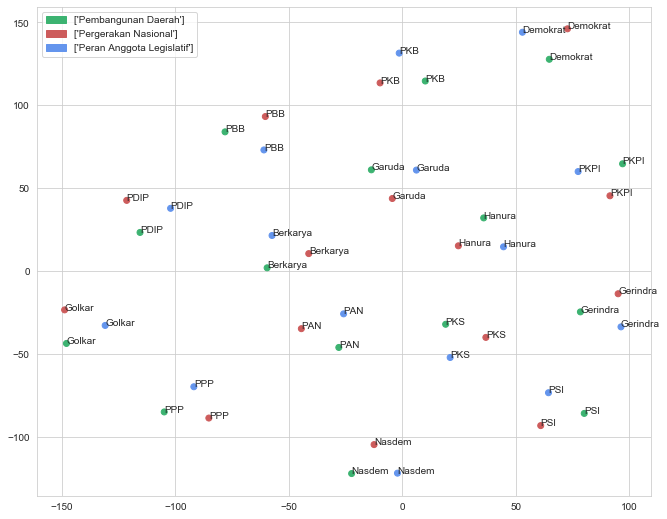

In [55]:
figure = plt.figure(figsize=(11,9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=colors)

i = 0
for partaiku in nodepartai2:
    ax.annotate(partaiku, (embeddings_2d[i,0], embeddings_2d[i, 1]))
    i=i+1
    

partai_legend=[mpatches.Patch(color=color, label=df.partai.unique()) for df.partai, color in warna_kategori.items()]
ax.legend(handles=partai_legend);

In [56]:
preds = nx.jaccard_coefficient(g)
for u, v, p in preds:
    if (p>0.9):
        print(u, v, p)

perintah fungsi 0.9333333333333333
perintah Peran Anggota Legislatif 0.9333333333333333
perintah Pergerakan Nasional 0.9333333333333333
perintah provinsi 0.9333333333333333
perintah Pembangunan Daerah 0.9333333333333333
perintah masyarakat 0.9333333333333333
perintah tingkat 0.9333333333333333
perintah dprd 0.9333333333333333
perintah bangun 0.9333333333333333
perintah juang 0.9333333333333333
provinsi fungsi 1.0
provinsi Peran Anggota Legislatif 1.0
provinsi Pergerakan Nasional 1.0
provinsi Pembangunan Daerah 1.0
provinsi masyarakat 1.0
provinsi bidang 0.9333333333333333
provinsi tingkat 1.0
provinsi dprd 1.0
provinsi bangun 1.0
provinsi juang 1.0
PKPI PAN 0.9333333333333333
PKPI Hanura 0.9333333333333333
PKPI Garuda 0.9333333333333333
PKPI PSI 0.9333333333333333
PKPI PKS 0.9333333333333333
PKPI Berkarya 1.0
PKPI PDIP 0.9333333333333333
Demokrat Golkar 0.9285714285714286
Demokrat Gerindra 0.9285714285714286
Demokrat PPP 0.9285714285714286
Demokrat PKB 0.9285714285714286
bidang fungsi 

In [57]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 100 for v in degree_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,node_color=node_color,node_size=node_size )
plt.axis('off')

NameError: name 'degree_dict' is not defined